data_vector


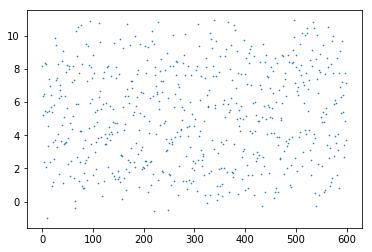

mean_sequence


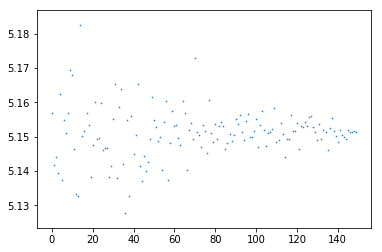

std_dev_sequence


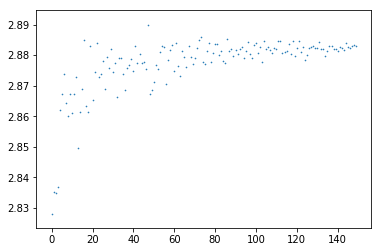

std_of_the_sample_means_given_frac_list


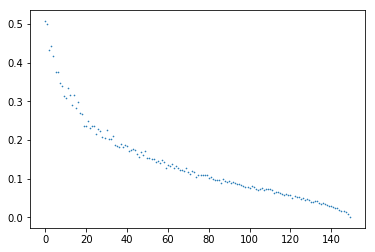

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#
# Suppose we are interested in the convergence of the mean
# of a quantity that is expensive to sample.  
#
# We'd like to know when we have sampled sufficiently,
# and be able to quantify the degree of conifdence that the
# mean of our sample is stable. 

# That is, we want to say that the sample mean is within some tolerance of
# the "true mean" - the mean we'd calculate if we let the sample size go to infinity.
#
#
# Let {xi} be a sequence or set of observations of the quantity whose true mean
# is desired.
#   

mean_sequence                           = []
std_dev_sequence                        = []
std_of_the_sample_means_given_frac_list = []

# data is our {xi} whose convergence is of interest
# here it is a noise sine shifted up by about 5
data = pd.DataFrame.from_dict( {'xi':[ np.sin(np.random.rand()*2*np.pi) + 10*np.random.rand() for i in range(1,601) ]} )


#
# fraction is the percentage of {xi} sampled
# for computing the mean of the sample.
#
# 5 percent of the size of xi is the smallest sample
# the largest sample will be all of xi
#
#
# fractions contains the list of sample sizes n (actually, f = floor(n/len(xi)))
#
max_frac = 1     
min_frac = 0.05   
num_samples_at_each_fraction = 300 
num_fracs = 150
fractions = np.linspace(min_frac, max_frac, num_fracs)


#
# Iterate over the sample size fractions
# "fraction == frac" is synonymous with "sample size"
# ... (actually, frac = floor(n/len(xi)) where n is the sample size)
#
for fraction in fractions:
    # given a sample size (fraction), the list of computed means of particular random samples
    frac_sample_mean_list = []
    frac_std_dev_list     = []
    #
    # do num_samples times:
    #
    for i in range(num_samples_at_each_fraction):   
        
        samp      = data.sample(frac=fraction)
        
        this_mean = np.average(samp.xi)
        frac_sample_mean_list.append(this_mean)
        
        this_std_dev = np.std(samp.xi)
        frac_std_dev_list.append(this_std_dev)
        
    
    frac_std_of_the_means = np.std(frac_sample_mean_list)
    # mean of the frac*len(xi) sized partial means of xi
    frac_mean             = np.average(frac_sample_mean_list)
    # mean of the frac*len(xi) sized partial std_devs of xi
    std_dev_mean          = np.average(frac_std_dev_list)
    # we keep track of the standard deviation of the set of means generated at each frac
    std_of_the_sample_means_given_frac_list.append(frac_std_of_the_means)
    
    mean_sequence.append(frac_mean)
    std_dev_sequence.append(std_dev_mean)


assert len(mean_sequence) == len(std_dev_sequence) == len(std_of_the_sample_means_given_frac_list)

def scatter(pdseries, title_string):
    plt.scatter(range(len(pdseries)), pdseries, marker='.', s=1.5)
    print(title_string)
    #plt.title(title_string)
    plt.show()


data_vector = data.xi

for var in (data_vector, mean_sequence, std_dev_sequence, std_of_the_sample_means_given_frac_list):
    title_string = [ k for k,v in locals().items() if v is var ][0]
    scatter(var, title_string)

